<h1 align="center"><b>Modelación Financiera I</b></h1>
<h1 align="center"><b> Módulo 7 </b></h1>
<h1 align="center"><b> Aprendizaje de Máquina - Regresión  </b></h1>

*** 

***Docente:*** Santiago Rúa Pérez, PhD.

***e-mail:*** srua@udemedellin.edu.co

***Herramienta:*** [Jupyter Notebook](http://jupyter.org/)

***Kernel:*** Python 3.7

***MEDELLÍN - COLOMBIA***

***2022***

***

# Tabla de contenido

* [1. Introducción al Aprendizaje de Máquina](#0)
* [2. Modelos de aprendizaje supervisado](#1)
    * [2.1. Regresión lineal](#1.1)    
    * [2.2. Regresión regularizada](#1.2)
    * [2.3. Regresión de soporte vectorial](#1.3)
    * [2.4. K-Vecinos más cercanos](#1.4)
    * [2.5. Arboles de regresión (CART)](#1.5)
    * [2.6. Métodos de ensamble](#1.6)
    * [2.7. Redes neuronales](#1.7)
* [3. Desempeño de los modelos](#2)
    * [3.1. Overfitting y Underfitting](#2.1)   
    * [3.2. Validación cruzada](#2.2)   
    * [3.3. Métricas de evaluación](#2.3)
* [4. Selección de modelos](#3)
* [5. Laboratorio](#4)

<a id='0'></a>
# 1. Introducción al Aprendizaje de Máquina

El aprendizaje de máquina está categorizado como un subcampo de la inteligencia artificial. En el contexto de la ciencia de datos, el aprendizaje de máquina se puede como un medio para construir modelos que mejor represente el comportamiento de los datos. Fundamentalmente, involucra la construcción la construcción de modelos matemáticos que representan los datos. 

Una vez los modelos son ajustados a los datos observados, se espera que pueda realizar predicciones sobre datos no observados. 

## Categorías del Aprendizaje de Máquina

En el nivel más fundamental, el aprendizaje de máquina puede dividirse en dos tipos: **aprendizaje supervisado** y **aprendizaje no supervisado**. 

 - El **aprendizaje supervisado** implica modelar de alguna manera la relación entre las características medidas de los datos y alguna etiqueta asociada con los datos. Una vez que se determina este modelo, se puede usar para aplicar etiquetas a datos nuevos y desconocidos. Esto se subdivide en tareas de **clasificación** y tareas de **regresión**: en la clasificación, las etiquetas son categorías discretas, mientras que en la regresión, las etiquetas son cantidades continuas. Solo nos enfocaremos en regresión supervisada
 
 - El **aprendizaje no supervisado** implica modelar las características de un conjunto de datos sin hacer referencia a ninguna etiqueta y, a menudo, se describe como "dejar que el conjunto de datos hable por sí mismo". Estos modelos incluyen tareas como el agrupamiento y la reducción de dimensionalidad.

## Modelos

La clasificación y la regresión son problemas muy distintos, los cuales usan diferentes métricas para poder evaluar su desempeño. Sin embargo, ambos comparten el mismo concepto, el de predecir una etiqueta dada unas variables conocidas. Lo anterior ocasiona que algunos de los algoritmos puedan usarse en los dos problemas. En la siguiente figura vemos una lista de métodos que se pueden aplicar a cada uno de estos

<center><img src="img/SupervisedLearning.png"/></center>

<a id='1'></a>
# 2. Modelos de aprendizaje supervisado

El objetivo de esta sección es entender el concepto general de los diferentes modelos y saber utilizarlos teniendo en cuenta la implementación de scikit-learn. No vamos a entrar en detalle de la matemática detras de cada uno de estos, porque necesitariamos un curso completo para el mismo. Adicionalmente se revisará las ventajas y desventajas de los mismos.

<a id='1.1'></a>
## 2.1. Regresión lineal

La regresión lineal es el método mas conocido posiblemente por todos los profesionales. Tambien es conocido como regresión de mínimos cuadrados y es muy utilizado en estadística. Este es un modelo lineal, por lo que se asume una relación lineal entre las diferentes variables de entrada y la única salida que se tiene. Lo anterior significa que nuestro modelo esta dado por 

$$y = \beta_0 + \beta_1 x_1 + ... + \beta_i x_i$$

en donde, $\beta_0$ es llmado intercepto y los demás coeficientes de la regresión. Para proceder a entrenar este modelo, es importante definir una función de costo que nos cuantifique que tan preciso es. La forma más típica en este escenario es la suma del cuadrado de los residuos *RSS*, el cual estaría dado por

$$RSS = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij} \right)^2$$

en donde, $\beta_0$ es el intercepto, $\beta_j$ representa el coeficiente, $x_{ij}$ representa la observación $i$ y la variable $j$

<center><img src="img/Residual.png"/></center>

Vamos a comenzar generando datos artificial en donde conocemos el intercepto y los coeficientes

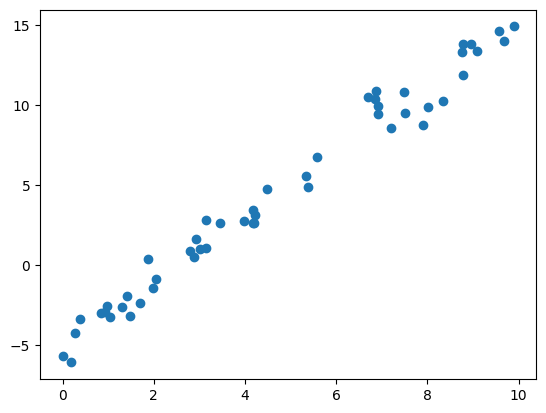

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Notese que en la realidad, nosotros solo diponemos de los valores de $x$ y la etiqueta $y$. Entonces procedemos a encontrar un modelo que mejor se ajuste a esots datos

Model slope:       2.03
Model intercept:  -5.00


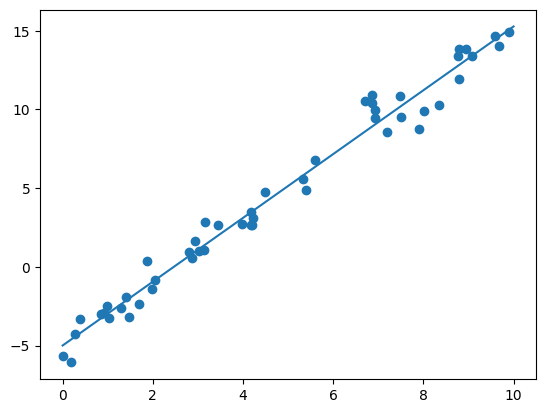

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope:       {:.2f}".format(model.coef_[0]))
print("Model intercept:  {:.2f}".format(model.intercept_))

Sin embargo, esta función es mucho mas poderosa y puede aproximar sistemas mas complejos, por ejemplo

In [3]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
coefReal = [1.5, -2., 1.]
y = 0.5 + np.dot(X, coefReal) + rng.randn(100)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.6562333465768173
[ 1.48159542 -1.97622428  0.97258042]


### Ventajas y desventajas

En términos de ventajas, la regresión lineal es facil de entender e implementar. Sin embargo, puede no funcionar bien cuando se tiene relaciones altamente no lineales. La regresión lineal tiende a realizar overfitting cuando se presenta un gran número de variables de entrada. También requiere de ciertas suposiciones como la ausencia de multicolinealidad. 

<a id='1.2'></a>
## 2.2. Regresión regularizada

Como se menciono anteriormente, cuando se tienen muchas variables de entrada, la regresión lineal tratará de realizar el ajuste lo mas parecido a los datos de entrenamiento, por lo que con nuevo datos puede que no se comporte bien. Esto se conoce como overfitting o alta varianza. 

Una forma de controlar este comportamiento es la *regularización*, el cual involucra una adición de un término de penalidad a la función de error. Hay diferentes formas de realizar la regulariazación

### Regularización L1 o Regresión de Lasso

Esta se realiza mediante la adición de un factor a la suma de la función de costo. La función de costo entonces estará represetada como

$$CostFunction = RSS + \lambda \sum_{j=1}^p |\beta_j|$$

Este tipo de regularización puede ocasionar que el resultado tenga algunos coeficientes en cero. Entre mas largo sea el valor de $\lambda$, mayor será la penalización, es decir, mas cercano a cero será el coeficiente. 

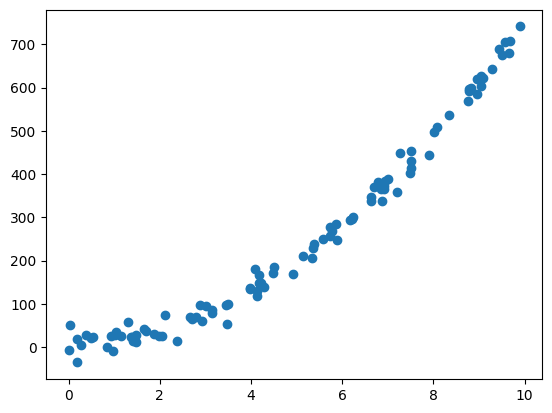

In [4]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 1)
y = 0.5 + 5*X + 7*X**2 + 20*rng.randn(100,1)
plt.scatter(X,y)

model = Lasso(alpha = 0.5, fit_intercept=True)

In [5]:
X_train = np.concatenate((X, X**2), axis=1)
model.fit(X_train,y)

xfit = np.linspace(0, 3, 1000)
xfit = xfit[:, np.newaxis]
xfit = np.concatenate((xfit,xfit**2),axis=1)
yfit = model.predict(xfit)

print(model.intercept_)
print(model.coef_)

[10.56437826]
[1.06342213 7.33276477]


### Regularización L2 o Regresión de Ridge

Regularización L2 se realiza adicionando un factor a la suma del cuadrado de los coeficientes. 

$$CostFunction = RSS + \lambda \sum_{j=1}^p \beta_j^2$$

Al igual que el anterior, el término de penalidad sirve para reducir los coeficientes y de esta forma reducir la complejidad del modelo. 

In [6]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y)

print(model.intercept_)
print(model.coef_)

[9.18191585]
[[1.83646676 7.25922198]]


### Red elástica

Esta regularización se basa en la combinación de las dos anteriores. 

$$CostFunction = RSS + \lambda \left( (1-\alpha)/2 \sum_{j=1}^p \beta_j^2 + \alpha \sum_{j=1}^p |\beta_j|\right)$$

In [7]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train,y)

print(model.intercept_)
print(model.coef_)

[10.99766655]
[0.89421595 7.34481272]


<a id='1.3'></a>
## 2.3. Regresión de soporte vectorial

Las máquinas de soporte vectorial en un modelo de aprendizaje supervisado el cual consiste en representar los datos mediante el uso de un hiperplano, el cual esta definido como el vector entre los puntos mas cercanos al modelo. 

<center><img src="img/LinearSVR.png"/></center>

Los parámetros mas importantes a entender son:
- Kernel: es la función no lineal que posibilita mover el espacio de estado
- C: parámetro de regularización. Que tan cerca quiero cumplir todos los datos. 
- gamma: el parámetro define que tanta influencia con respecto a un ejemplo se quiere. Un gamma bajo significa que quiero poca influencia.


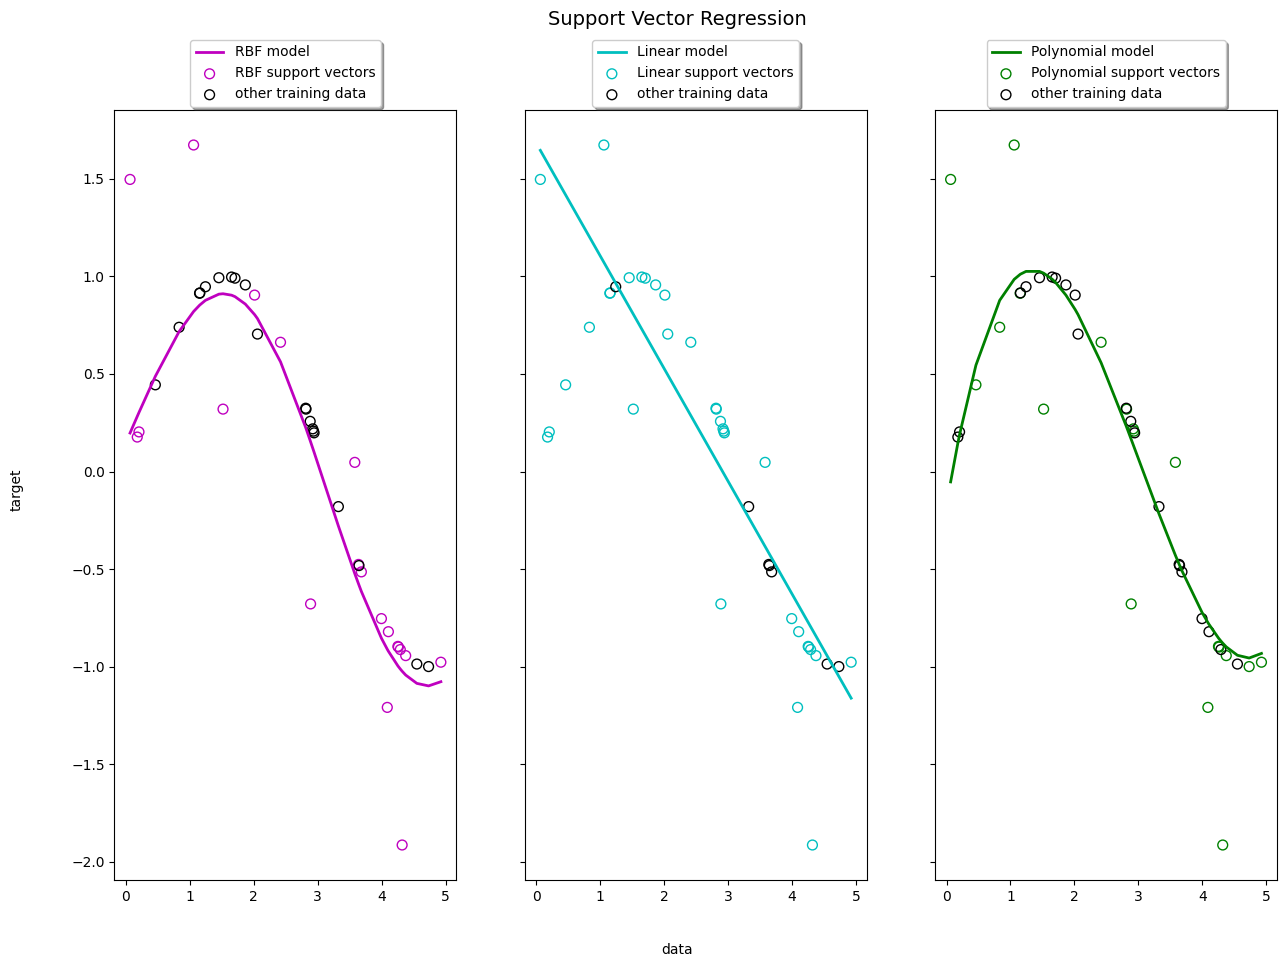

In [8]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Ventajas y desventajas

En términos de ventajas, SVM es bastante robusto contra el sobreajuste, especialmente en dimensiones altas. Maneja bastante bien las relaciones no lineales. Además, no hay ningún requisito de distribución de los datos.

En términos de desventajas, SVM puede ser ineficiente para entrenar y requiere mucha memoria para
correr y sintonizar. No funciona bien con grandes conjuntos de datos. Requiere el escalado de características de los datos. También hay muchos hiperparámetros, y sus significados son a menudo
no intuitivo.



<a id='1.4'></a>
## 2.4. K-vecinos más cercanos

Los k-vecinos mas cercanos son considerados algoritmo perezoso, ya que no requiere ningun parámetro del modelo. Para nuevos datos, la predicción la hace buscando los K datos mas cercanos y generando la salida de acuerdo a estos valores. Lo anterior implica que se requiere un métrica de distancia como la Euclideana

$$d(a,b) = \sqrt{\sum_{i=1}^n (a_i-b_i)^2}$$

Los pasos se pueden resumir de la siguiente forma:

- Elegir el valor de K y la métrica a usar
- Encuentre los k-vecinos más cercanos.
- Haga un promedio de la salida de dichos valores

In [9]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X, y)

KNeighborsRegressor()

Los parámetros más importantes a ajustar son: Cantidad de vecinos, y métrica de distancia

### Ventajas y desventajas

En cuanto a las ventajas, no implica formación y, por tanto, no hay fase de aprendizaje.
Dado que el algoritmo no requiere entrenamiento antes de hacer predicciones, se pueden obtener nuevos datos agregado sin problemas sin afectar la precisión del algoritmo. 

En cuanto a las desventajas, la métrica de distancia a elegir no es obvia y difícil justificar en muchos casos. KNN funciona mal en conjuntos de datos de alta dimensión. Eso es costoso y lento para predecir nuevas instancias debido a la distancia a todos los vecinos debe ser recalculado. KNN es sensible al ruido en el conjunto de datos.




<a id='1.5'></a>
## 2.5. Arboles de regresión

Este algortimo se basa en la construcción de un árbol de decisión para generar la salida. Este arbol de decisión es construido a partir de lógica *if-then*, el cual permite una predicción. Los arboles de regresión y clasificación (CART) son modelos atractivos por su fácil interpretación. 

<center><img src="img/RegressionTree.png"/></center>

Crear este arbol binario, se puede realizar mediante divisiones sucesivas y evaluando el resultado en cada una de ellas. Algunos de los parámetros más importantes en este clasificador son:

 - *Criterio*: es la función que mide la calidad de la división. Por defecto esta el error cuadrático medio.
 - *max_depth*: profundidad máxima del arbol
 - *min_samples_split*: la cantidad mínimo de datos que puede agrupar una decisión.

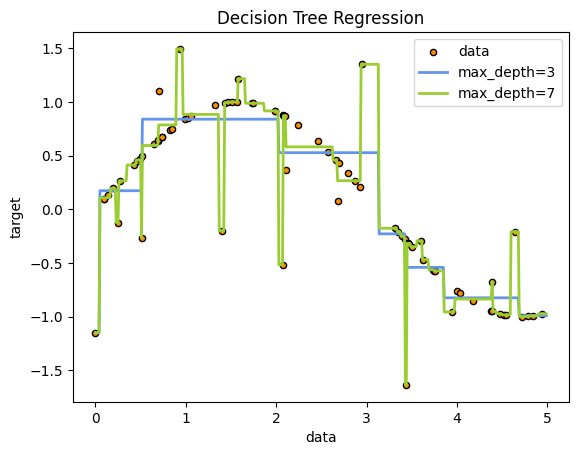

In [10]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=7)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=7", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Ventajas y desventajas

En términos de ventajas, CART es fácil de interpretar y puede adaptarse para aprender complejas relaciones. Requiere poca preparación de datos, y los datos normalmente no necesitan ser escalados. La importancia de la característica se incorpora debido a la forma en que se construyen los nodos de decisión. Funciona bien en grandes conjuntos de datos. Funciona tanto para problemas de regresión como de clasificación.

En términos de desventajas, CART es propenso a sobreajustarse a menos que se utilice prunning. Puede ser muy poco robusto, lo que significa que pequeños cambios en el conjunto de datos de entrenamiento pueden conducir a diferencias bastante importantes.

<a id='1.6'></a>
## 2.6. Métodos de ensamble

El objetivo de estos algoritmos es la de combinar diferentes clasificadores en un meta-clasificador que tenga un desempeño general mejor en comparación con cada modelo de forma indvidual. Suponga que tenga 10 expertos que predicen algo, entonces usted diseña una estrategia para unir esos 10 resultados. 

Los dos métodos más populares son **bagging** y **boosting**. **Bagging** consiste en entrenar diferentes modelos individuales de forma paralela. Cada modelo es entrenado por un subconjunto de los datos. Posteriormente la salida es promediada de todos los modelos. Por otro lago, **boosting** consiste en entrenar diferentes modelos individuales de forma secuencial. Primero se entrena uno con los datos y luego el modelo siguiente trata de corregir los errores de dicho modelo. Los modelos son adicionados hasta lograr el desempeño requerido. 

Por ejemplo, **los bosques aleatorios (random forest)**, es una versión de esamble tipo bagging usando arboles de decisión. 

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

Existen otros algoritmos que puede consultar:
   - Extra trees
   - AdaBoost
   - Gradient boosting method

### Ventajas y desventajas

El algoritmo (o modelo) de bosque aleatorio ha ganado gran popularidad en aplicaciones ML durante la última década debido a su buen rendimiento, escalabilidad y facilidad de uso. Es flexible y asigna naturalmente la importancia de las características.

En términos de desventajas, el bosque aleatorio puede parecer un enfoque de caja negra, ya que tienen muy poco control sobre lo que hace el modelo, y los resultados pueden ser difíciles de interpretar. Aunque el bosque aleatorio hace un buen trabajo en la clasificación, puede que no sea bueno para problemas de regresión, ya que no proporciona una predicción precisa de la naturaleza continua.

<a id='1.7'></a>
## 2.7. Redes neuronales

Las redes neuronales es un algoritmo de aprendizaje de máquina inspirado por las neuronas biológicas de nuestro cerebro. Las redes neuronales artificial estan constituidas por la interconexión de unidades o neuronas, y sus diferentes conexiones entre ellas.

La información de entrada comienza por la capa inicial a interactuar con las neuronas y a producir salidas de acuerdo al comportamiento de cada una de ellas.

La primera arquitectura creada de este tipo se conocio como el **perceptron**, el cual esta formado por una series de entras con pesos asociados. La salida tiene una unica unidad lógica con una función que se activa o no dependiendo de un umbral

<center><img src="img/Perceptron.png"/></center>

Mas adelante se comenzó con la conexión de diferentes neuronas a la entrada para generar diferentes pesos, creando de esta forma las capas de una red neuronal artificial. La función de salida de cada una de estas viene dada por

$$h_{W,b} (X) = \phi (XW + b)$$

De esta forma, mas la unión de diferentes capas, se crea el Perceptron multicapa

<center><img src="img/PerceptronMulticapa.png"/></center>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

split = int(0.8*len(X))

X_train, X_test = X[0:split], X[split:] 
y_train, y_test = y[0:split], y[split:] 

mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), 
                 tol = 1e-2, 
                 max_iter = 1000, 
                 random_state = 0),
)
mlp.fit(X_train, y_train)

c:\Users\santi\anaconda3\envs\mlfinance\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000,
                              random_state=0, tol=0.01))])

El valor del RSME es: 60.32018443474295


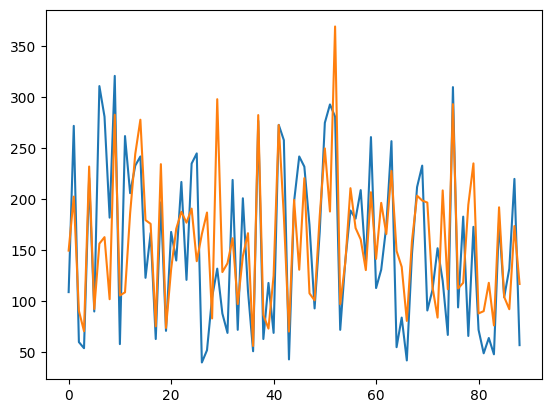

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = mlp.predict(X_test)
RSME = mean_squared_error(y_test, y_pred, squared = False)

print("El valor del RSME es: {}".format(RSME))

plt.plot(y_test)
plt.plot(y_pred)

<a id='2'></a>
## 3. Desempeño de los modelos

Hasta el momento hemos visto un listado grande de modelos de aprendizaje supervisado para regresión. Estos modelos poseen diferentes características y parámetros de configuración, los cuales puedan ocasionar diferentes comportamientos. Entrenarlos de una forma puede ocasionar un sobreajuste sobre los datos observados y no es capaz de generalizar bien en los datos no vistos, o viceversa. Es importante entender entonces como medir el desempeño de dichos modelos de forma adecuada.

<a id='2.1'></a>
## 3.1. Overfitting y Underfitting

Uno de los problemas más comunes en los modelos de aprendizaje de máquina es el *overffiting*, el cual consiste en que el modelo aprende perfectamente los datos de entrenamiento, pero no generaliza bien sobre los datos no vistos. Lo anterior ocurre cuando el modelo comienza a seleccionar y tratar de ajustarse inclusive a patrones de los datos que pueden ser ocasionados por ruido o mas señales. 

Por otro lado, *underffiting* es el proceso contrario, en donde el modelo es tan simple que no es capaz de modelar las complejidades de los datos presentes. 

<center><img src="img/UnderOver.png"/></center>

Estos dos conceptos estan estrechamente relacionados con el concepto de *bias-variance tradeoff*. *Bias* se refiere al error que existe debido a la suposición simplista de un modelo para representar los datos. Un bias alto significa que va a ocurrir un fenómeno de underfitting, lo que ocasiona que nuestro algoritmo va a perder importantes tendencias. *Variance* se refiere al error producido por un modelo el cual trata de simular todos los datos a la perfección. Un alta varianza, significa que los datos predichos estan muy cercas a los reales. Lo anterior ocasiona overffiting.

El mundo ideal seria en la mitad. Las forma para combatir estos problemas es:
 - Usar mas datos de entrenamiento 
 - Usar regularización

<a id='2.2'></a>
## 3.2. Validación cruzada

La validación cruzada consiste en encontrar el mejor modelo o arquitectura posible que generalice los datos teniendo en cuenta solo los datos de entrenamiento. 

La idea entonces será la de dividir el conjunto de entrenamiento una o varias veces para construir dos conjuntos el de validación y el de entrenamiento. El de entrenamiento lo usamos para ajustar el modelo y el de validación para mirar que tan bien generaliza. K-fold es un método muy usado para dividir el el conjunto en k subconjuntos o particiones.

<center><img src="img/KFold.png"/></center>

La única desventaja de este método es el costo computacional. Adicionalmente cuando se trabaja con series de tiempo es importante no hacer esta división de forma aleatoria. En este caso lo que se hace es de forma subsecuente. Scikit-learn nos facilita esto presentandonos la función `TimeSeriesSplit`

In [14]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


<a id='2.3'></a>
## 3.3. Métricas de evaluación

Es importante entender las métricas que se utilizan para evaluar los algoritmos de aprendizaje de máquina. Las métricas son diferentes tanto para clasificación como para regresión. 

<center><img src="img/Metricas.png"/></center>

Especificamente para la regresión son:
 - **El error absoluto medio(MAE)**: es la suma de las diferencias absolutas entre la predicción y el valor actual
 - **El cuadrático medio (MSE)**: representa la desviación estandar de las diferentes entre los valores reales y la predicción (residuos).
 - **R cuadrado ($R^2$)**: da una indicación de que tan buenas son las predicciones con respecto al valor actual. Los valores van entre 0 y 1, donde 0 es que no se parecen y 1 esta perfectamente. 
 - **R cuadrado ajustado**: ajusta el R cuadrado teniendo en cuenta los términos del modelo. 
 
Por lo general el MSE es utilizado cuando lo único que se quiere es exactitud en el modelo. R cuadrado se utiliza para indicar que tan bien la variable independiente explica la variabilidad en la variable dependiente.

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<a id='3'></a>
## 4. Selección de modelos

Seleccionar el modelo perfecto de aprendizaje automático es tanto un arte como una ciencia. Teniendo en cuenta los modelos de aprendizaje automático, no existe una solución o enfoque que se adapte a todos. Hay varios factores que pueden afectar su elección de un modelo de aprendizaje automático. El principal criterio en la mayoría de los casos es el rendimiento del modelo. Sin embargo, hay muchos otros factores a considerar al seleccionar el modelo.

### Algunos factores relevantes

- *Simplicidad*: El grado de simplicidad del modelo. La simplicidad por lo general resulta en más rápido, más modelos y resultados escalables y más fáciles de entender.

- *Tiempo de entrenamiento*: velocidad, desempeño, uso de memoria, y tiempo para entrenamiento

- *Manejo de no linealidad*: manejar no linealidades en el modelo

- *Robustez a overfitting*: la habilidad para generalizar

- *Tamaño del dataset*: como escala su complejidad de acuerdo a la cantidad de datos

<center><img src="img/Comparacion.png"/></center>

### Ejemplo Final

El objetivo de este ejemplo es recopilar un poco la información que se ha trabajado y tratar de comparar diferentes modelos de regresión. Para lo anterior se usará un dataset que tiene la base de datos de ventas de carros.

Las variables independientes usadas son: edad, genero, promedio de millas por dia, deudas personales e ingreso mensual

In [16]:
import pandas as pd

dataset = pd.read_csv("./data/cars.csv")
dataset.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


Lo primero que se puede obtener es una estadísticas descriptiva de los datos

In [17]:
dataset.describe()

,age,gender,miles,debt,income,sales
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


Notese que se tienen alrededor de 900 ventas, con un promedio de venta de alrededor de 11.000 USD. Vamos a analizar y detectar datos faltantes, y analizar la distribución conjunta de los datos

age       0
gender    0
miles     0
debt      0
income    0
sales     0
dtype: int64


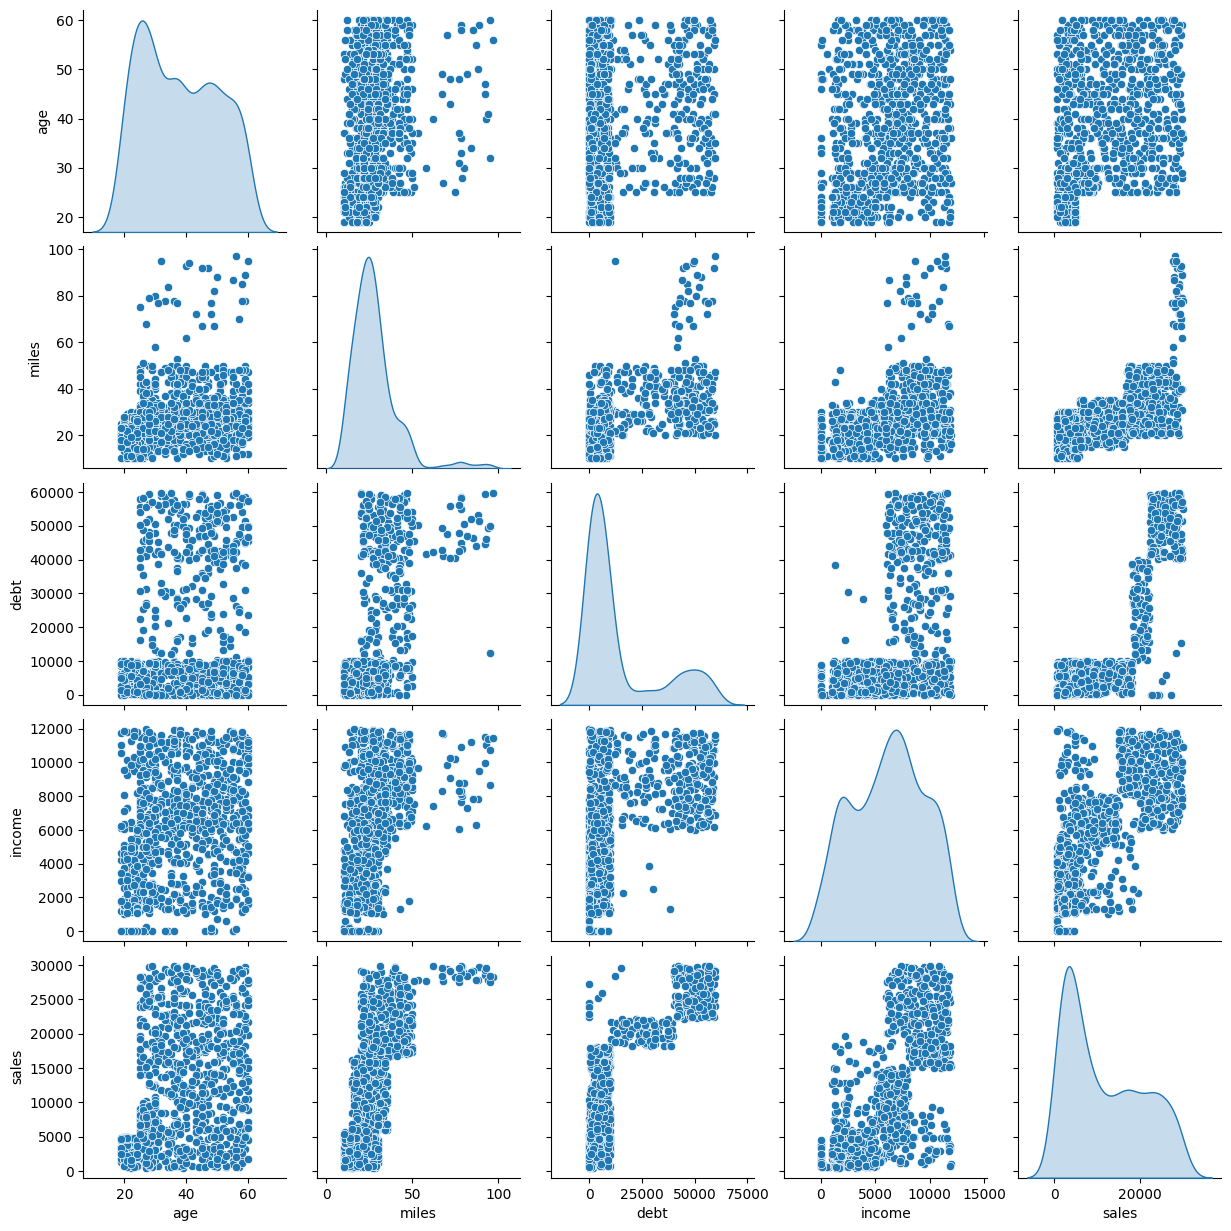

In [18]:
import seaborn as sns

# Finding all the columns with NULL values
print(dataset.isna().sum())
# Drop the rows with missing values
dataset = dataset.dropna()

sns.pairplot(dataset[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

A continuación procedemos a realizar el split de los conjuntos y definición de los mismos

In [19]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

X_train, y_train = train_dataset[['age', 'miles', 'debt', 'income']], train_dataset[['sales']].values.ravel()
X_test, y_test = test_dataset[['age', 'miles', 'debt', 'income']], test_dataset[['sales']].values.ravel()

Antes de realizar cualquier algoritmo, vamos a proceder a crear un objeto de normalizador y una lista con los modelos a probar

In [20]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

normObj = StandardScaler()

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [21]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

num_folds = 10
seed = 7
scoring = 'r2' 

names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    # Pipeline Creation
    pipe = Pipeline([('scaler', StandardScaler()), (name, model)])
    
    ## K Fold analysis:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = 1* cross_val_score(pipe, X_train, y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = pipe.fit(X_train, y_train)
    train_result = r2_score(res.predict(X_train), y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = r2_score(res.predict(X_test), y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.826362 (0.025857) 0.795788 0.774962
LASSO: 0.826362 (0.025852) 0.795725 0.774898
EN: 0.785549 (0.019147) 0.599208 0.598239
KNN: 0.851730 (0.028622) 0.889845 0.852509
CART: 0.818536 (0.064150) 1.000000 0.828521
SVR: -0.085025 (0.086870) -12642.777198 -9990.926498
MLP: -1.672803 (0.279601) -5906.261352 -5335.414232
ABR: 0.844965 (0.027354) 0.798283 0.708627
GBR: 0.899641 (0.024083) 0.944938 0.886026
RFR: 0.900596 (0.022936) 0.986619 0.867888
ETR: 0.896640 (0.023123) 1.000000 0.872978


Podemos comparar

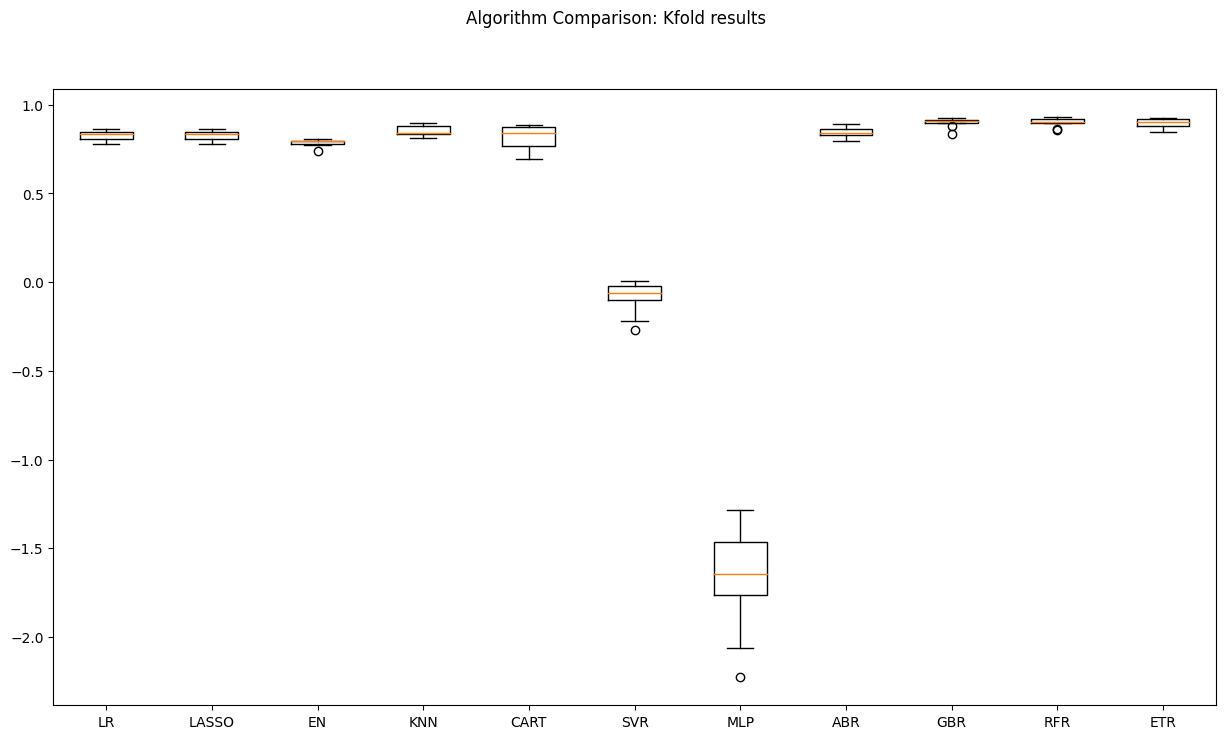

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)

Quitando SVR y MLP

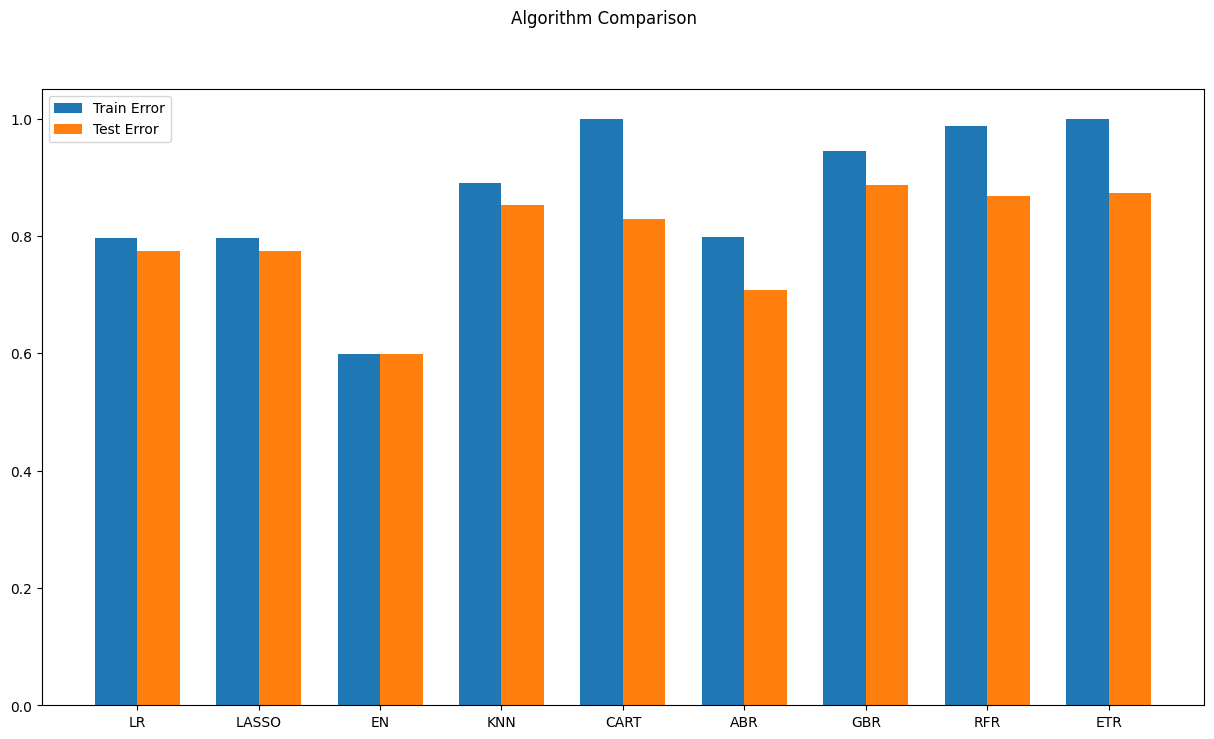

In [23]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names)-2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results[0:5] + train_results[7:],  width=width, label='Train Error')
plt.bar(ind + width/2, test_results[0:5] + test_results[7:], width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names[0:5] + names[7:]);

In [28]:
params_grid = {
    "GBR__n_estimators": [500,1000,2000],
    "GBR__max_depth": [4, 8, 12],
    "GBR__min_samples_split": [5,10],
    "GBR__learning_rate": [0.01],
    "GBR__loss": ["squared_error"],
}

pipe = Pipeline([('scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])
search = GridSearchCV(pipe, params_grid, scoring = scoring, n_jobs=12, verbose = True)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameter (CV score=0.907):
{'GBR__learning_rate': 0.01, 'GBR__loss': 'squared_error', 'GBR__max_depth': 4, 'GBR__min_samples_split': 10, 'GBR__n_estimators': 500}


In [29]:
# estimate r2 on test set
predictions = search.best_estimator_.predict(X_test)
print(r2_score(y_test, predictions))

0.8973430173358646


<a id='4'></a>
## 5. Laboratorio

- Utilizar alguna base de datos propias y aplicar algunos de los modelos vistos en clase. Sino tiene, proceder con los laboratorio finales del curso que tienen la combinación de todo